# Left Ventricle Full Quantification (LVQuan18) Challenge MICCAI 2018

Accurate cardiac left ventricle (LV) quantification is among the most clinically important and most frequently demanded tasks for identification and diagnosis of cardiac diseases and is of great interest in the research community of medical image analysis.

### The task

We must segment the LV from the SAX MR sequences of the heart. The focus will be on full quantification of LV, i.e., all clinical significant LV indices regarding to the anatomical structure of LV are investigated in addition to the frequently studied LV volume;

### The dataset

A training dataset with processed SAX MR sequences of 145 subjects from clinical environment is used for model learning and validation.

For each subject, 20 frames are included for the whole cardiac cycle. All ground truth values of the above-mentioned LV indices are provided for every single frame. More details about the training dataset can be found in the document of the DIG-Cardiac dataset. 

In [25]:
import numpy as np
from matplotlib import pyplot as plt
PATH='./'

## Dataset exploration

The provided dataset is a matlab file (.mat). 

Thus we're going to use scipy.io which can open this kind of file in python.

In [7]:
import scipy.io as sio

data = sio.loadmat(PATH+'cardiac-dig.mat')
data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'areas', 'dims', 'endo_LV', 'epi_LV', 'images_LV', 'lv_phase', 'pix_spa', 'ratio_resize_inverse', 'rwt'])

In [17]:
f'{data["images_LV"].shape}, 2900 / 20 frames =  {2900/20} patients'

'(80, 80, 2900), 2900 / 20 frames =  145.0 patients'

In [33]:
n_diastolic = np.sum(data["lv_phase"] == 0) // 20
n_systolic = np.sum(data["lv_phase"] == 1) // 20
print(f'Number of sequences in diastolic phase :  {n_diastolic}')
print(f'Number of sequences in systolic phase  :  {n_systolic}')
print(f'Total                                  : {n_diastolic + n_systolic}')


Number of sequences in diastolic phase :  84
Number of sequences in systolic phase  :  61
Total                                  : 145


### Look at the first patient MR sequence 

In [34]:
patient = data['images_LV'][:,:,:20]
patient.shape

(80, 80, 20)

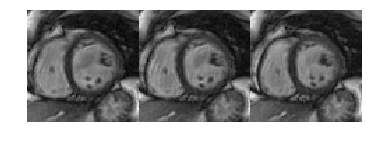

In [46]:
n = 3
slice_sample = np.hstack([patient[:,:,i] for i in range(n)])
plt.imshow(slice_sample, cmap='gray')
plt.axis("off")
plt.show()
